# End-to-End Model Demo
This notebook aims to demonstrate the usage of the proposed model on the simulated dataset. 
<br>`utils.head.end2end` combines the **object_detector**, **calibration network**, and **distance estimator** as a single model.

In [42]:
import tqdm as tqdm
import torch
import numpy
from utils.head import end2end
from utils.dataset import aircraft_camera_data
import torch.nn as nn
from utils.head import *
device = torch.device('cuda:0')

In [43]:
t = 3 # Time - 5
w = 1 # Weather - 5
r = 1 # Runs - 3

data_indexes = [1,2] # Camera 1 & 2
touchdown_target_lat_lon = [1.3541354199301814, 103.97961848373048] # WSSS 02L Runway
dataset_directory = "/media/gabriel/DATA/dataset"
data_sources = [[f'{dataset_directory}/t{t}/r{r}/w{w}/{data_index}/data.pkl', f'{dataset_directory}/t{t}/r{r}/w{w}/{data_index}/video.avi'] for data_index in data_indexes]

# Dataset Class Initialization
acd = aircraft_camera_data(data_sources = data_sources, touchdown_target_lat_lon = touchdown_target_lat_lon)

In [107]:
# Initialize the model
offset = [[19.75390625, 248.5, 9.0, 5.5], [5.056640625, 248.5, 10.109375, 4.5]]
divider = [[1895.24609375, 395.75, 175.25, 151.0],[1909.443359375, 396.5, 172.640625, 83.5]]
model = end2end('models/config/model_m_m.yaml', model_state_dict='models/head/big_dataset/kaiming_3/m_m.pt', offset = offset, divider = divider, device = device)

Input_Reg Aux DE Loaded


In [127]:
# Get the Image
n = 5300
img = acd.get_frame_from_video(n, size = (1280, 1920), batch_size = 1).cuda()
gt = acd.get_current_dtt(n)

In [139]:
# Predict dtt
box, score, pred = model.single_infer(img)

Time Profile:

Object Detector    : 43.85 ms
Preprocessing      : 0.17 ms
Distance Estimator : 0.89 ms

Total Time         : 44.91 ms (22.26488730345787 FPS)
            


(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

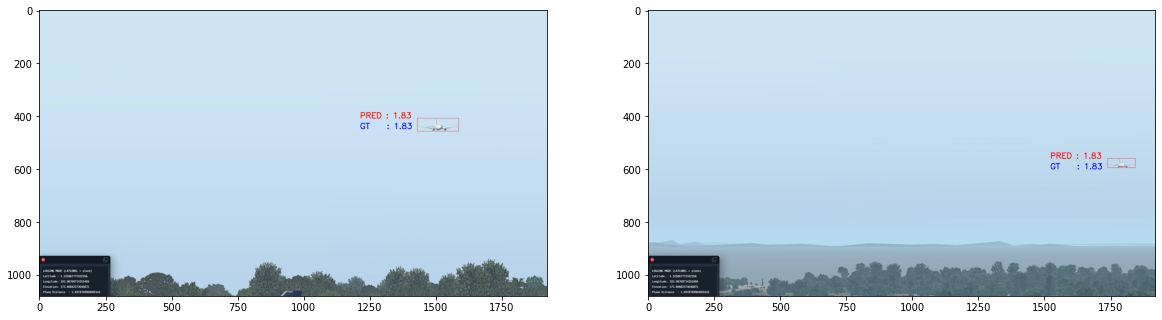

In [134]:
# Visualize
model.vis(img, box[0].reshape(2,4), score, pred, gt)